In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('housedataset.csv')

Using TensorFlow backend.


In [2]:
#df.head()
#df.info()
#histogram
#df.describe().transpose()


In [3]:
df.head()

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
YearBuilt       1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(9)
memory usage: 102.8 KB


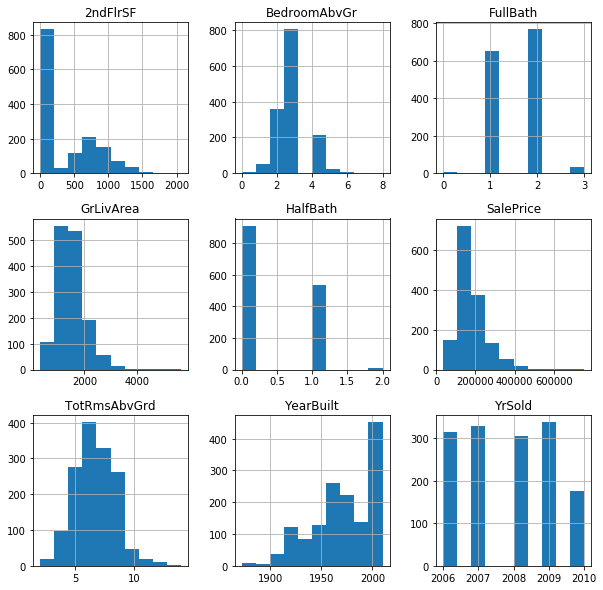

In [5]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.00,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.0,0.0,1.00,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.00,14.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.00,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0


In [7]:
#Now we set our x value to every attribute except for the sale price, and our y value to the sale price, since that will be what we are predicting
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]

In [8]:
#Let's build the model
model = keras.models.Sequential()

model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
#Now fit the model
model.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/30
1460/1460 [==============================] - 1s 630us/step - loss: 39350242334.8603
Epoch 2/30
1152/1460 [======================>.......] - ETA: 0s - loss: 38759458872.8889

D:\anaconda data\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1460/1460 [==============================] - 0s 148us/step - loss: 39092337049.6000
Epoch 3/30
1460/1460 [==============================] - 0s 140us/step - loss: 38944826320.3069
Epoch 4/30
1460/1460 [==============================] - 0s 136us/step - loss: 38792816387.5069
Epoch 5/30
1460/1460 [==============================] - 0s 138us/step - loss: 38502188579.0685
Epoch 6/30
1460/1460 [==============================] - 0s 135us/step - loss: 37984421590.6192
Epoch 7/30
1460/1460 [==============================] - 0s 134us/step - loss: 37244343657.9069
Epoch 8/30
1460/1460 [==============================] - 0s 141us/step - loss: 36230107551.2110
Epoch 9/30
1460/1460 [==============================] - 0s 137us/step - loss: 34923770299.2658
Epoch 10/30
1460/1460 [==============================] - 0s 135us/step - loss: 33315319061.7425
Epoch 11/30
1460/1460 [==============================] - 0s 136us/step - loss: 31422955312.3945
Epoch 12/30
1460/1460 [==============================] - 0s

In [10]:
test_data = np.array([2003, 854,  1710, 2, 1, 3, 8, 2008])
print(model.predict(test_data.reshape(1,8), batch_size=1))

[[202169.88]]
